In [1]:
#In this project we will be implementing the stochastic block model which can be used to plot or visualize the given eigenvalues,
#eigenvectors of any given function
#we will be implementing our own custom stochastic block model algorithm capable of using the pygsp module which is a Python package
# to ease Signal Processing on Graphs and plotting any given given array like parameter (i.e p and q)
#Note that the pygsp module is used only for plotting the eigenvectors and eigenvalues graphs
#we will then start by importing the necesary libraries to help in the implementation

In [2]:
pip install pygsp  #installing the pygsp module for graph plotting

In [3]:
#importing all important libraries
from pygsp.graphs import Graph
from pygsp import utils
from pygsp import graphs
import numpy as np
from scipy import sparse

In [4]:
#implementing our custom stochastic block model 
class StochasticBlockModel(Graph):
    #lets initialize our parameters
    def __init__(self, N=None,  self_loops=False, M=None, p=None, q=None, max_iter=10,directed=False, connected=False,
                 seed=None,k=None, z=None, **kwargs):
      
        #defining the parameters

        # k is the number of classes to be used
        # N is the given number of nodes 
        # M  is the matrix containing the nodes probability
        # p is the diagonal values
        # q is the off diagonal values


        # setting the random binary edges for the triangle of the matrix
        binary_edges_t = np.random.RandomState(seed)

        edges=z
        if edges is None:
            edges = binary_edges_t.randint(0, k, N)
            edges.sort()  

        #next is that we gonna generate stochastic block model matrix 
        if M is None:

            p = np.asarray(p)
            if p.size == 1:
                num_classes=k
                p = p * np.ones(num_classes)
            if p.shape != (num_classes,):
                raise ValueError('Given parameter p is neither a scalar nor a vector.') #this checks the validity of the given p value in
                #the matrix

            if q is None:
                q = 0.3 / num_classes
            q = np.asarray(q)
            if q.size == 1:
                q = q * np.ones((num_classes, num_classes))
            if q.shape != (num_classes, num_classes):
                raise ValueError('Given parameter q is neither a scalar nor a vector .')

            # re-setting the matrix containing the nodes probability equal to off diagonal values
            M = q

            #function to edit the diagonal entries
            M.flat[::num_classes+1] = p 

        if (M < 0).any() or (M > 1).any():
            raise ValueError('Values should be in range of [0, 1].')

        for iteration_val in range(max_iter):
            # getting the eigenvalues and eigenvectors of the matrix
            total_rows_val, total_columns_val = 0, 0
            data_val, i, csr_j = [], [], []
            for egn in range(N**2):
                if total_rows_val != total_columns_val or self_loops:
                    if total_rows_val >= total_columns_val or directed:
                        if binary_edges_t.uniform() < M[z[total_rows_val], z[total_columns_val]]:
                            data_val.append(1)
                            i.append(total_rows_val)
                            j.append(total_columns_val)
                if total_rows_val < N-1:
                    total_rows_val += 1
                else:
                    total_rows_val = 0
                    total_columns_val += 1

            W = sparse.csr_matrix((data_val, (i,j)), shape=(N, N))

            #this is gonna be making the matrix symmetric
            if not directed:
                W = utils.symmetrize(W, method='tril')

            if not connected:
                break
            else:
                self.W = W
                self.A = (W > 0)
                if self.is_connected(recompute=True):
                    break
            if iteration_val == max_iter - 1:
                raise ValueError('Sorry, graph could not be fully connected after {} trials,try to raise the connection value mark or the number of trials.'.format(max_iter))

        self.info = { z,np.bincount(z), np.sqrt(N)}

        #calling the SBM model
        model = 'StochasticBlockModel'
        super(StochasticBlockModel, self).__init__(gtype=model, W=W, **kwargs)


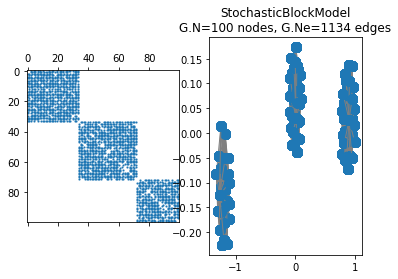

In [5]:
#we gonna be showing the  matrix, Fiedler vector and eigenvalues

# (i) plot for p=0.7 and  q=0

import matplotlib.pyplot as plt
Model = graphs.StochasticBlockModel(N=100,  p=0.7, q=0, seed=1,k=3)
Model.set_coordinates(seed=1)
fig, axes = plt.subplots(1,2)
_ = axes[0].spy(Model.W, markersize=1)
Model.plot(ax=axes[1])

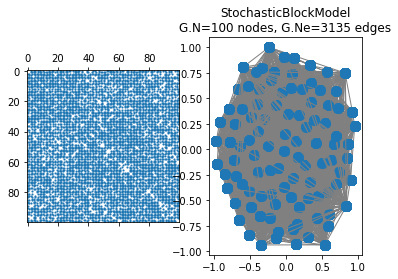

In [6]:
# (ii) plot for p=0.7 and  q=0.6

Model = graphs.StochasticBlockModel(N=100,  p=0.7, q=0.6, seed=1,k=3)
Model.set_coordinates(seed=1)
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(Model.W, markersize=1)
Model.plot(ax=axes[1])

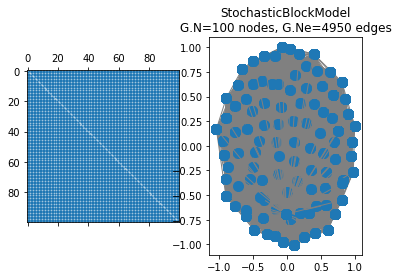

In [7]:
# (iii) plot for p=1 and  q=1

Model = graphs.StochasticBlockModel(N=100,  p=1, q=1, seed=1,k=3)
Model.set_coordinates(seed=1)
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(Model.W, markersize=1)
Model.plot(ax=axes[1])

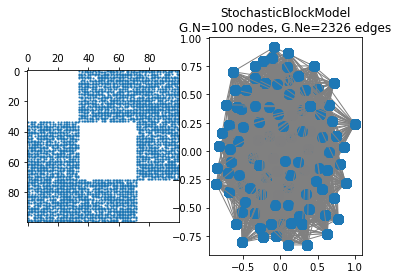

In [8]:
# (iv) plot for p=0 and  q=0.7

Model = graphs.StochasticBlockModel(N=100,  p=0, q=0.7, seed=1,k=3)
Model.set_coordinates( seed=1)
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(Model.W, markersize=1)
Model.plot(ax=axes[1])

In [9]:
#the kind of graph shown above is an inferring modular network graph with well deeply connected nodes

END OF STOCHASTIC BLOCK MODEL IMPLEMENTATION AND TESTING.  THANK YOU!!!